# IMDB Dataset - Capstone Project

Description:Capstone Project IMDB Dataset
    
Phase=3 and Phase=4

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
#Loading dataset 1
Df1=pd.read_csv("dataset1.csv")
Df1

,Unnamed: 0,Serial_num,Title,Time,Year,Rate,Score,Director1,Director2,Director3
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
2,2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1765,1765,"1,766",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1766,1766,"1,767",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1767,1767,"1,768",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN
1768,1768,"1,769",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [3]:
#Loading dataset 2
Df2=pd.read_csv("dataset2.csv")
Df2


,Unnamed: 0,Name,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
0,0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,742,985"
1,1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,899,714"
2,2,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"187,670"
3,3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,434,096"
4,4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,928,128"
...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1765,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"179,068"
1766,1766,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,820"
1767,1767,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1768,1768,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,601"


In [4]:
df=pd.DataFrame()

In [5]:
# joing two dataset into one dataset 
df=pd.merge(Df1, Df2)
df

,Unnamed: 0,Serial_num,Title,Time,Year,Rate,Score,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,742,985"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,899,714"
2,2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,...,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"187,670"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,434,096"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,928,128"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1765,"1,766",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,...,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"179,068"
1766,1766,"1,767",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,...,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,820"
1767,1767,"1,768",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,...,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1768,1768,"1,769",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,...,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,601"


After joining the two dataset we have created the one dataset with 1770 rows and 21 columns.


In [6]:
df.head()

,Unnamed: 0,Serial_num,Title,Time,Year,Rate,Score,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
0,0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,742,985"
1,1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,899,714"
2,2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,...,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"187,670"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,434,096"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,928,128"


checking the first five columns of the dataset

In [7]:
df.tail()

,Unnamed: 0,Serial_num,Title,Time,Year,Rate,Score,Director1,Director2,Director3,...,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
1765,1765,"1,766",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,...,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"179,068"
1766,1766,"1,767",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,...,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,820"
1767,1767,"1,768",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,...,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1768,1768,"1,769",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,...,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,601"
1769,1769,"1,770",Sadak 2,133,2020,1.2,Nan,Mahesh Bhatt,NaN,NaN,...,Alia Bhatt,Pooja Bhatt,Aditya Roy Kapoor,Sanjay Dutt,Action,Drama,Nan,Nan,TV-MA,"96,357"


checking the last 5 columns of the dataset

In [8]:
#dropping the unwanted column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df

,Serial_num,Title,Time,Year,Rate,Score,Director1,Director2,Director3,Name,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
0,1,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,742,985"
1,2,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,899,714"
2,3,Spider-Man: Across the Spider-Verse,140,2023,8.9,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"187,670"
3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,434,096"
4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,928,128"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,"1,766",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"179,068"
1766,"1,767",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,820"
1767,"1,768",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1768,"1,769",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,601"


After dropping the unwanted column,now we 1770 rows and 20 columns 

In [10]:
df.sample(5)


,Serial_num,Title,Time,Year,Rate,Score,Director1,Director2,Director3,Name,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
269,270,Grindhouse,191,2007,7.5,77,Robert Rodriguez,Eli Roth,Quentin Tarantino,Grindhouse,Kurt Russell,Rose McGowan,Danny Trejo,Zoë Bell,Action,Horror,Thriller,25.04,R,"187,965"
17,18,Spider-Man: Into the Spider-Verse,117,2018,8.4,87,Bob Persichetti,Peter Ramsey,Rodney Rothman,Spider-Man: Into the Spider-Verse,Shameik Moore,Jake Johnson,Hailee Steinfeld,Mahershala Ali,Animation,Action,Adventure,190.24,PG,"610,044"
12,13,Harakiri,133,1962,8.6,85,Masaki Kobayashi,NaN,NaN,Harakiri,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,Action,Drama,Mystery,Nan,Not Rated,"62,199"
1302,"1,303",Lockout,95,2012,6.0,48,James Mather,Steve Saint Leger,NaN,Lockout,Guy Pearce,Maggie Grace,Peter Stormare,Vincent Regan,Action,Sci-Fi,Thriller,14.33,PG-13,"99,924"
417,418,Arlington Road,117,1999,7.2,65,Mark Pellington,NaN,NaN,Arlington Road,Jeff Bridges,Tim Robbins,Joan Cusack,Hope Davis,Action,Crime,Drama,24.36,R,"89,569"


checking the random columns of the dataset 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1770 entries, 0 to 1769
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Serial_num   1770 non-null   object 
 1   Title        1770 non-null   object 
 2   Time         1770 non-null   int64  
 3   Year         1770 non-null   int64  
 4   Rate         1770 non-null   float64
 5   Score        1770 non-null   object 
 6   Director1    1770 non-null   object 
 7   Director2    114 non-null    object 
 8   Director3    13 non-null     object 
 9   Name         1770 non-null   object 
 10  Star1        1770 non-null   object 
 11  Star2        1770 non-null   object 
 12  Star3        1770 non-null   object 
 13  Star4        1770 non-null   object 
 14  Genre1       1770 non-null   object 
 15  Genre2       1770 non-null   object 
 16  Genre3       1770 non-null   object 
 17  Collection   1770 non-null   object 
 18  Certificate  1770 non-null   object 
 19  Votes 

This method shows the good overview of the dataset.

In the above dataset there is some missing values present in the different columns of the data.

The dataset consist the object,float and int type

The memory usage of the dataset is 290.4+ KB.

In [12]:
df.dtypes   

Serial_num      object
Title           object
Time             int64
Year             int64
Rate           float64
Score           object
Director1       object
Director2       object
Director3       object
Name            object
Star1           object
Star2           object
Star3           object
Star4           object
Genre1          object
Genre2          object
Genre3          object
Collection      object
Certificate     object
Votes           object
dtype: object

Checking the datatype of different columns

The dtype of the dataset is object 

In [13]:
  df.shape

(1770, 20)

The above dataset contains 1770 rows and 20 columns including the target variable 

In [14]:
# Value counts for each feature data
for i in df.columns:
        print(df[i].value_counts())
        print('-----------------')

1        1
1,176    1
1,187    1
1,186    1
1,185    1
        ..
588      1
587      1
586      1
585      1
1,770    1
Name: Serial_num, Length: 1770, dtype: int64
-----------------
Mr                                         3
G                                          3
Ghost in the Shell                         2
Point Break                                2
Kill Bill: Vol                             2
                                          ..
A Knight's Tale                            1
Star Wars: Episode VIII - The Last Jedi    1
Con Air                                    1
Robin Hood: Prince of Thieves              1
Sadak 2                                    1
Name: Title, Length: 1728, dtype: int64
-----------------
107    49
100    43
109    42
110    41
98     40
       ..
45      1
166     1
176     1
201     1
75      1
Name: Time, Length: 118, dtype: int64
-----------------
2016    78
2014    78
2018    71
2011    69
2013    68
        ..
1948     1
1932     1
1938     

This method helps in checking the value counts of each columns.

In [15]:
df.replace("Nan", np.nan, inplace=True)

In [16]:
df.isnull().sum()

Serial_num        0
Title             0
Time              0
Year              0
Rate              0
Score           188
Director1         0
Director2      1656
Director3      1757
Name              0
Star1             0
Star2             1
Star3             1
Star4             2
Genre1            0
Genre2            1
Genre3          148
Collection      293
Certificate      10
Votes             0
dtype: int64

This method helps in checking null values in the dataframe. 

In the above dataset different columns consists some null values 


<AxesSubplot:>

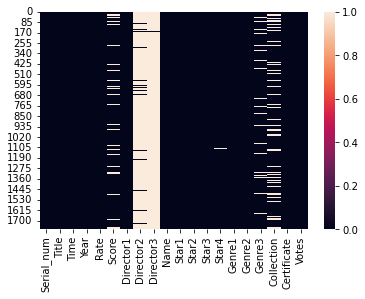

In [17]:
sns.heatmap(df.isnull())


In the above plot we observe that the column Director2 and Director3 has the maxiumum number of null value  due to which it indicates the white line in the above heat map.


In [18]:
df.drop(["Director2","Director3"], axis=1, inplace=True)


Dropping the unwanted column in the dataset

In [19]:
df.isnull().sum()

Serial_num       0
Title            0
Time             0
Year             0
Rate             0
Score          188
Director1        0
Name             0
Star1            0
Star2            1
Star3            1
Star4            2
Genre1           0
Genre2           1
Genre3         148
Collection     293
Certificate     10
Votes            0
dtype: int64

In [20]:
df['Score'] = df['Score'].fillna(df['Score'].mode()[0])

df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

df['Genre3'] = df['Genre3'].fillna(df['Genre3'].mode()[0])




Using mode to fill null values for object columns -Score, Certificate and genre 3

In [21]:
df['Collection'] = df['Collection'].astype(float)

df['Collection'] = df['Collection'].fillna(df['Collection'].mean())

In [22]:
df.isnull().sum().sum()

5

In [23]:
df.dropna(inplace=True)

df.isnull().sum().sum()

0

In [24]:
df.duplicated().sum()

0

All null values have been treated or removed. No duplicates are there in the dataset.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1769
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Serial_num   1767 non-null   object 
 1   Title        1767 non-null   object 
 2   Time         1767 non-null   int64  
 3   Year         1767 non-null   int64  
 4   Rate         1767 non-null   float64
 5   Score        1767 non-null   object 
 6   Director1    1767 non-null   object 
 7   Name         1767 non-null   object 
 8   Star1        1767 non-null   object 
 9   Star2        1767 non-null   object 
 10  Star3        1767 non-null   object 
 11  Star4        1767 non-null   object 
 12  Genre1       1767 non-null   object 
 13  Genre2       1767 non-null   object 
 14  Genre3       1767 non-null   object 
 15  Collection   1767 non-null   float64
 16  Certificate  1767 non-null   object 
 17  Votes        1767 non-null   object 
dtypes: float64(2), int64(2), object(14)
memory usage

<AxesSubplot:>

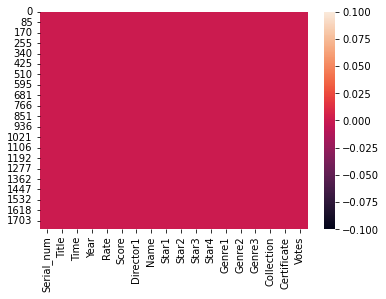

In [26]:
sns.heatmap(df.isnull())

In the above dataset we have removed the null values

In [27]:
df['Score'] = df['Score'].astype(int)

df['Votes'] = df['Votes'].str.replace(',', '').astype(int)



In [28]:
category_column=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_column.append(i)
print(category_column)

['Serial_num', 'Title', 'Director1', 'Name', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3', 'Certificate']



This method shows the lists of category columns in the dataset

In [29]:
number_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        number_column.append(i)
print(number_column)

['Time', 'Year', 'Rate', 'Score', 'Collection', 'Votes']


This method shows the lists of number columns in the dataset

# EDA

In [30]:
df.columns

Index(['Serial_num', 'Title', 'Time', 'Year', 'Rate', 'Score', 'Director1',
       'Name', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'Collection', 'Certificate', 'Votes'],
      dtype='object')


This method shows the columns present in the dataset

In [31]:
df.columns.tolist()

['Serial_num',
 'Title',
 'Time',
 'Year',
 'Rate',
 'Score',
 'Director1',
 'Name',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'Genre1',
 'Genre2',
 'Genre3',
 'Collection',
 'Certificate',
 'Votes']

converting the columns name into list format 

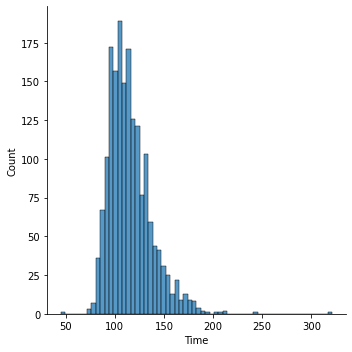

In [32]:
sns.displot(data=df, x="Time")
plt.show()

In the above plot most movies are 90 to 120 minutes long.

Very less movies are there which are less than 60 minutes or more than 200 minutes.



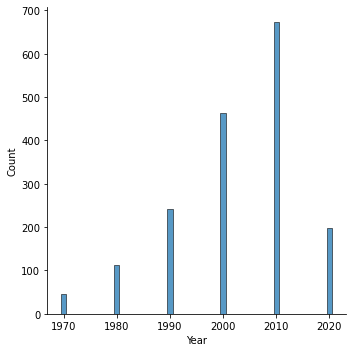

In [33]:
# Number of movies launched in different year

sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))

plt.show()

Most movies have been launched in the year of 2000-2010.

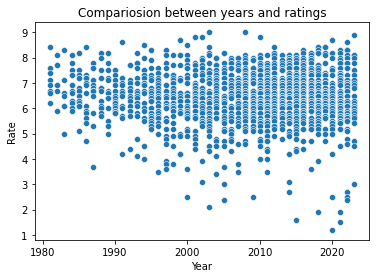

In [34]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rate"])
plt.title("Compariosion between years and ratings")
plt.show()


Highest rated movies have been released in years between 2000-2010.

Some of new movies launched between year 2015-2020 has been the lowest rated movies.

Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

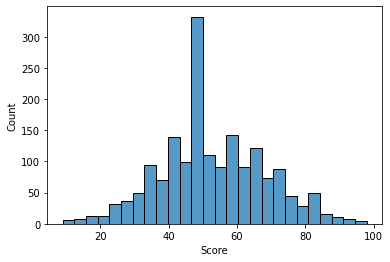

In [35]:
#Checking the score of different moives 

sns.histplot(x=df["Score"])
plt.show()

In the above plot score varies between 0 to 100 while most movies has score lies around 50

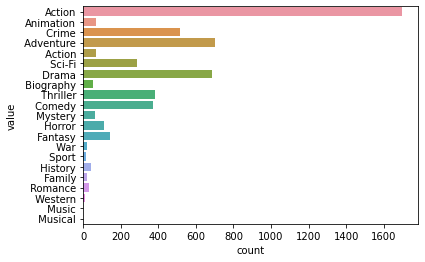

In [36]:
#checking the different genre of moives

sns.countplot(data=pd.melt(df, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

In the above plot most movies are of action genre. 

While crime, adventure Sci-fi and drama are most common genre.

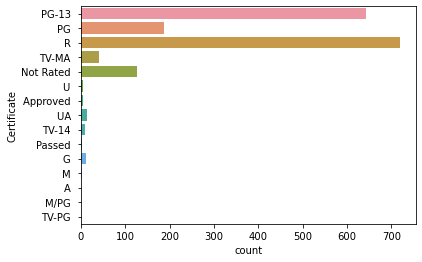

In [37]:
#checking the certificate of moives

sns.countplot(y=df["Certificate"])
plt.show()

In the above plot most movies are PG-13 and R rated.

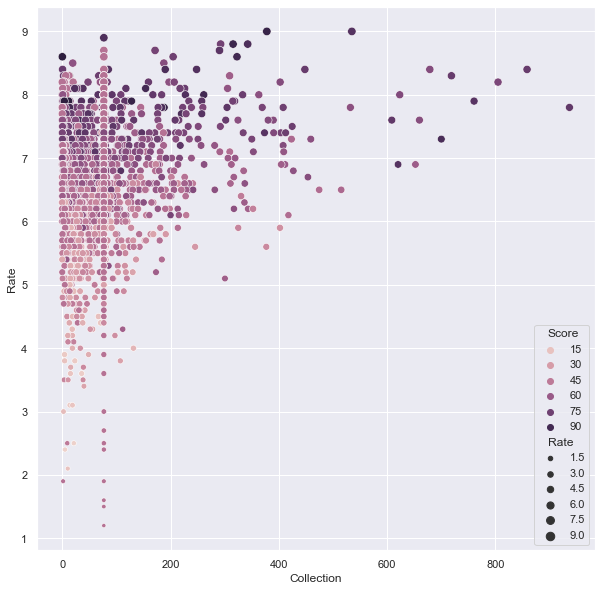

In [38]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Collection", y="Rate",
                      hue="Score", size="Rate",
                      data=df)

In the above plot higher rated movies have been found to have higher collection.

While with high rating and score, movies have been found to be grossing below average.

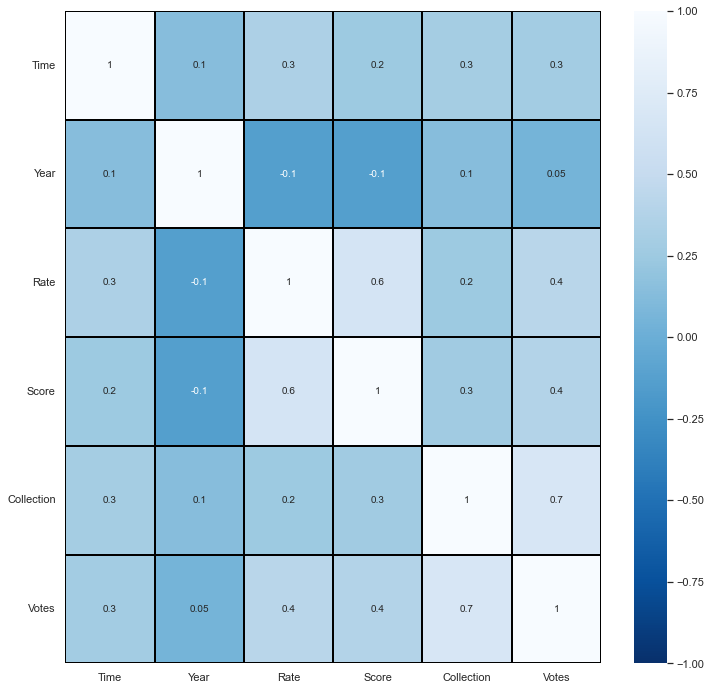

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

This heatmap shows the correlation matrix by visualizing the data. 

Score and rate are co related.

Collection and votes are co related.

In [40]:
corr= df.corr()
corr

,Time,Year,Rate,Score,Collection,Votes
Time,1.000000,0.140583,0.338061,0.244226,0.290620,0.278777
Year,0.140583,1.000000,-0.138574,-0.133300,0.136942,0.053610
Rate,0.338061,-0.138574,1.000000,0.647586,0.246149,0.421658
Score,0.244226,-0.133300,0.647586,1.000000,0.267449,0.378673
Collection,0.290620,0.136942,0.246149,0.267449,1.000000,0.672164
Votes,0.278777,0.053610,0.421658,0.378673,0.672164,1.000000



This method shows the correlation between the features and the target variables.

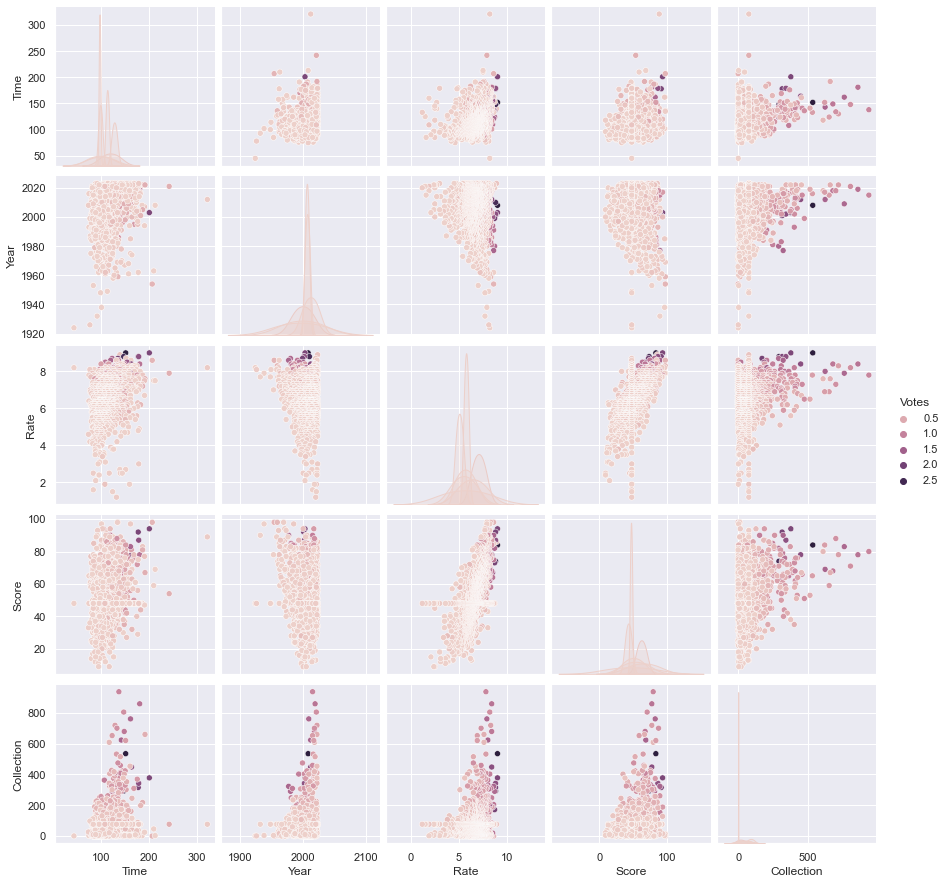

In [41]:
sns.pairplot(df,hue="Votes")

In [42]:
df.columns

Index(['Serial_num', 'Title', 'Time', 'Year', 'Rate', 'Score', 'Director1',
       'Name', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'Collection', 'Certificate', 'Votes'],
      dtype='object')

In [43]:
df1=df.drop(["Serial_num","Title","Name"], axis=1) 


Dropping the unwanted columns which is not further required anymore 

In [44]:
df1

,Time,Year,Rate,Score,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
0,152,2008,9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.860000,PG-13,2742985
1,201,2003,9.0,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.850000,PG-13,1899714
2,140,2023,8.9,86,Joaquim Dos Santos,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,76.903778,PG,187670
3,148,2010,8.8,74,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.580000,PG-13,2434096
4,178,2001,8.8,92,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.540000,PG-13,1928128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,109,2021,1.9,48,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,76.903778,TV-MA,179068
1766,160,2018,1.9,48,Remo D'Souza,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.690000,Not Rated,47820
1767,85,2015,1.6,48,Sean Cain,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,76.903778,R,42919
1768,125,2021,1.5,48,Keith English,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,76.903778,R,39601


After dropping the unwanted column we have created new dataframe with 1767 rows and 15 columns 

In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1['Director1']=LE.fit_transform(df1['Director1'])
df1['Star1']=LE.fit_transform(df1['Star1'])
df1['Star2']=LE.fit_transform(df1['Star2'])
df1['Star3']=LE.fit_transform(df1['Star3'])
df1['Star4']=LE.fit_transform(df1['Star4'])
df1['Genre1']=LE.fit_transform(df1['Genre1'])
df1['Genre2']=LE.fit_transform(df1['Genre2'])
df1['Genre3']=LE.fit_transform(df1['Genre3'])
df1['Certificate']=LE.fit_transform(df1['Certificate'])

In the above column the category columns have been converted into numerical columns by using label encoding.



In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1769
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         1767 non-null   int64  
 1   Year         1767 non-null   int64  
 2   Rate         1767 non-null   float64
 3   Score        1767 non-null   int32  
 4   Director1    1767 non-null   int32  
 5   Star1        1767 non-null   int32  
 6   Star2        1767 non-null   int32  
 7   Star3        1767 non-null   int32  
 8   Star4        1767 non-null   int32  
 9   Genre1       1767 non-null   int32  
 10  Genre2       1767 non-null   int32  
 11  Genre3       1767 non-null   int32  
 12  Collection   1767 non-null   float64
 13  Certificate  1767 non-null   int32  
 14  Votes        1767 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 209.5 KB


All columns have been converted into integer or float datatype.

In [47]:
z=np.abs(zscore(df1))
new_dataset=df1[(z<3).all(axis=1)]
new_dataset

,Time,Year,Rate,Score,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
8,153,2020,8.7,48,872,648,874,97,1377,0,5,4,76.903778,11,120059
19,137,1986,8.4,84,369,626,769,183,1055,0,1,13,85.160000,9,737285
20,101,2003,8.4,77,664,111,1160,648,746,0,5,11,0.710000,9,601843
23,145,2019,8.4,48,543,368,824,100,431,0,1,3,76.903778,5,36812
24,141,2019,8.4,48,926,166,717,992,1041,0,5,4,76.903778,5,31544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,95,1997,3.6,11,453,572,1061,508,1218,0,1,6,35.930000,7,56720
1747,99,2017,3.6,48,27,576,344,972,1060,0,5,4,76.903778,9,33496
1748,98,1996,3.5,40,194,517,47,15,280,0,11,4,3.790000,9,30465
1749,89,2011,3.5,37,766,310,512,586,1185,0,1,2,38.540000,6,27189


In the above method we have removed the outliers

In [48]:
df1

,Time,Year,Rate,Score,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Collection,Certificate,Votes
0,152,2008,9.0,84,153,121,415,2,910,0,4,4,534.860000,7,2742985
1,201,2003,9.0,94,691,187,1112,471,1029,0,1,4,377.850000,7,1899714
2,140,2023,8.9,86,415,621,403,161,835,1,0,0,76.903778,6,187670
3,148,2010,8.8,74,153,419,569,359,731,0,1,13,292.580000,7,2434096
4,178,2001,8.8,92,691,187,434,949,1236,0,1,4,315.540000,7,1928128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,109,2021,1.9,48,710,590,279,1018,522,0,4,15,76.903778,11,179068
1766,160,2018,1.9,48,731,43,982,149,524,0,4,15,1.690000,5,47820
1767,85,2015,1.6,48,817,195,473,1093,1424,0,7,13,76.903778,9,42919
1768,125,2021,1.5,48,503,706,59,115,414,0,4,4,76.903778,9,39601


In [49]:
loss_data = (1767-1559)/1767*100
loss_data

11.771363893604981

In the above column we have loss 11.77% of data by zscore method

In [50]:
new_dataset.skew()

Time           0.830144
Year          -0.927987
Rate          -0.304185
Score          0.169098
Director1     -0.117985
Star1          0.030681
Star2         -0.027607
Star3          0.020518
Star4          0.026457
Genre1         0.000000
Genre2         1.512745
Genre3         0.378183
Collection     1.839663
Certificate   -0.226078
Votes          1.978725
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5.

In [52]:
from sklearn.preprocessing import power_transform

for i in new_dataset.drop(["Collection","Votes"],axis=1).columns:
    if abs(new_dataset[f'{i}'].skew())>0.5:
        new_dataset[[f'{i}']]=power_transform(new_dataset[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Time
treated skewness for : Year
treated skewness for : Genre2


In [53]:
new_dataset.skew()

Time           0.022583
Year          -0.372622
Rate          -0.304185
Score          0.169098
Director1     -0.117985
Star1          0.030681
Star2         -0.027607
Star3          0.020518
Star4          0.026457
Genre1         0.000000
Genre2         0.085783
Genre3         0.378183
Collection     1.839663
Certificate   -0.226078
Votes          1.978725
dtype: float64

Skewness has been removed from all the required columns

In [54]:
X=new_dataset.drop(["Collection"],axis=1)
y=new_dataset["Collection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)


In [58]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)    
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy ={r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy = {r2_score(y_test,pred_test)}")
    print("\n\n")


At random state 0, the training accuracy =0.4856743423978118
At random state 0, the testing accuracy = 0.45885965435291687



At random state 1, the training accuracy =0.4799924128441183
At random state 1, the testing accuracy = 0.47767713165983816



At random state 2, the training accuracy =0.4856144604346948
At random state 2, the testing accuracy = 0.4633022666173251



At random state 3, the training accuracy =0.48022291103079173
At random state 3, the testing accuracy = 0.4855633154082273



At random state 4, the training accuracy =0.47940974000975123
At random state 4, the testing accuracy = 0.4847791720375022



At random state 5, the training accuracy =0.47861854044233487
At random state 5, the testing accuracy = 0.48346380614357576



At random state 6, the training accuracy =0.47407027991683337
At random state 6, the testing accuracy = 0.5134871574163222



At random state 7, the training accuracy =0.49828525851298977
At random state 7, the testing accuracy = 0.397799682951

At random state 68, the training accuracy =0.4996139897178796
At random state 68, the testing accuracy = 0.40853020045687205



At random state 69, the training accuracy =0.48546202914571424
At random state 69, the testing accuracy = 0.44241852942275595



At random state 70, the training accuracy =0.5020594923335798
At random state 70, the testing accuracy = 0.3826941320673771



At random state 71, the training accuracy =0.4863691622244911
At random state 71, the testing accuracy = 0.45833578886682325



At random state 72, the training accuracy =0.47964658651142533
At random state 72, the testing accuracy = 0.4872093047487751



At random state 73, the training accuracy =0.48731770310776334
At random state 73, the testing accuracy = 0.45020673331547245



At random state 74, the training accuracy =0.4855942435148696
At random state 74, the testing accuracy = 0.45888030184038353



At random state 75, the training accuracy =0.4906592325712621
At random state 75, the testing accuracy 

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=66)

In [67]:
lr.fit(x_train,y_train)  

LinearRegression()

In [68]:
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

0.5028097704892249
(1044, 14) (1044,)
(515, 14) (515,)


In [70]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 32.33654377675804
Mean Squared Error: 1753.7171324087049
Root Mean Squared Error: 41.87740598949158
R squared score:  0.5028097704892249
Cross Validation Score is : [0.43465363 0.38471287 0.39532024 0.54772363 0.47233545]
Mean Score : 0.44694916488717984
Difference : -0.05586060560204509


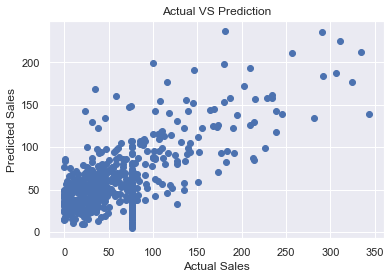



Scores for Lasso() are
Mean Absolute Error: 32.196705568272954
Mean Squared Error: 1760.406854825262
Root Mean Squared Error: 41.957202657294275
R squared score:  0.5009131906120111
Cross Validation Score is : [0.44303242 0.38870244 0.41359233 0.54212056 0.46400798]
Mean Score : 0.45029114842157847
Difference : -0.05062204219043265


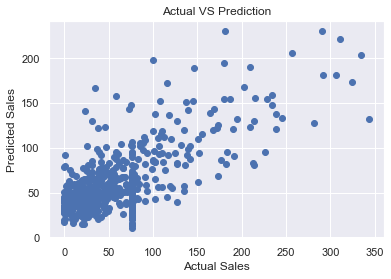



Scores for SVR() are
Mean Absolute Error: 37.02950764278617
Mean Squared Error: 2876.190216790342
Root Mean Squared Error: 53.63012415415745
R squared score:  0.1845813400713413
Cross Validation Score is : [0.13142657 0.16002716 0.12932608 0.13174281 0.11843797]
Mean Score : 0.13419212004426978
Difference : -0.050389220027071524


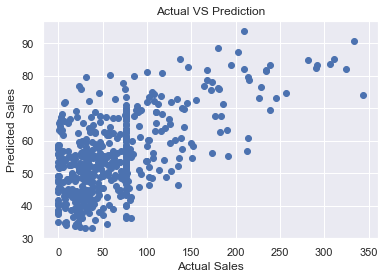



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 38.80622137499918
Mean Squared Error: 3558.52854863809
Root Mean Squared Error: 59.65340349584498
R squared score:  -0.008866021276736413
Cross Validation Score is : [-0.05876672 -0.25995008  0.06188468  0.2965012   0.39018181]
Mean Score : 0.08597017909276908
Difference : 0.09483620036950549


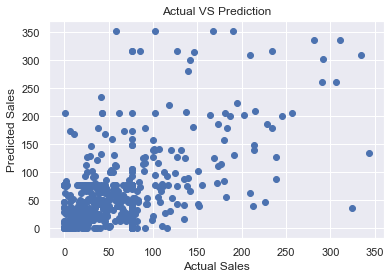



Scores for RandomForestRegressor() are
Mean Absolute Error: 27.023853495342845
Mean Squared Error: 1343.1457509978613
Root Mean Squared Error: 36.64895293180777
R squared score:  0.6192094312907596
Cross Validation Score is : [0.51906546 0.58277876 0.45643311 0.55999131 0.59579977]
Mean Score : 0.542813684187361
Difference : -0.07639574710339858


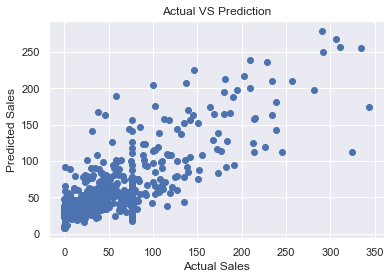



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 27.25466673786124
Mean Squared Error: 1330.3058624402543
Root Mean Squared Error: 36.473358255585055
R squared score:  0.6228496233267928
Cross Validation Score is : [0.55843421 0.57212698 0.49456906 0.61483052 0.60126536]
Mean Score : 0.5682452258664634
Difference : -0.05460439746032941


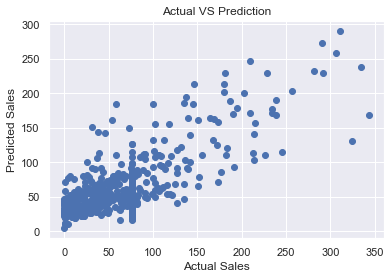

In [71]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predm)))
    print('R squared score: ', r2_score(y_test, predm))
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(y_test, predm))
    plt.scatter(y_test, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")


It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating overfitting/underfitting

In [72]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [73]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [74]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(x_train,y_train)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [75]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5694569652864965
The mean absolute error 29.72428873601649
root_mean_squared_error: 40.875527704213745


In [76]:
import joblib
joblib.dump(GB,"Collection.obj")

['Collection.obj']

In [77]:
Model=joblib.load("Collection.obj")

# Scaling of Independent Features

In [80]:
X=new_dataset.drop(["Votes"],axis=1)
y=new_dataset["Votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

# Predicting the best random state

In [81]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5370664068969138
At random state 0, The test accuracy is :0.510845056091816


At random state 1, The training accuracy is :0.5264750588910149
At random state 1, The test accuracy is :0.5332148990364907


At random state 2, The training accuracy is :0.5210342483607564
At random state 2, The test accuracy is :0.5426595739221192


At random state 3, The training accuracy is :0.5187177973441459
At random state 3, The test accuracy is :0.5515769759537663


At random state 4, The training accuracy is :0.545463996361197
At random state 4, The test accuracy is :0.4959198159206285


At random state 5, The training accuracy is :0.5285853835387342
At random state 5, The test accuracy is :0.5284809396293544


At random state 6, The training accuracy is :0.5413215006428994
At random state 6, The test accuracy is :0.49925021267646863


At random state 7, The training accuracy is :0.5294675422488375
At random state 7, The test accuracy is :0.524058237560

At random state 66, The training accuracy is :0.5320561573753646
At random state 66, The test accuracy is :0.5140072360033094


At random state 67, The training accuracy is :0.5232410794690026
At random state 67, The test accuracy is :0.538400462964876


At random state 68, The training accuracy is :0.5420997581281903
At random state 68, The test accuracy is :0.4998214912337525


At random state 69, The training accuracy is :0.5501318418814283
At random state 69, The test accuracy is :0.4765515101007858


At random state 70, The training accuracy is :0.5436404377459756
At random state 70, The test accuracy is :0.48837856811021607


At random state 71, The training accuracy is :0.532765988421174
At random state 71, The test accuracy is :0.5188163113106354


At random state 72, The training accuracy is :0.5414007536293892
At random state 72, The test accuracy is :0.4822575700498263


At random state 73, The training accuracy is :0.5382977635886133
At random state 73, The test accuracy is

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(1044, 14) (1044,)
(515, 14) (515,)


Scores for LinearRegression() are
Mean Absolute Error: 74806.66141551195
Mean Squared Error: 9545243590.422525
Root Mean Squared Error: 97699.7624890794
R squared score:  0.5332148990364907
Cross Validation Score is : [0.48470056 0.52273373 0.45921673 0.61510992 0.43848498]
Mean Score : 0.5040491825787983
Difference : -0.029165716457692392


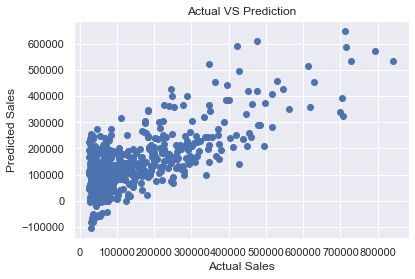



Scores for Lasso() are
Mean Absolute Error: 74806.42171706403
Mean Squared Error: 9545216142.319292
Root Mean Squared Error: 97699.62201727953
R squared score:  0.5332162413139838
Cross Validation Score is : [0.48470032 0.52273206 0.4592182  0.61511444 0.43849049]
Mean Score : 0.5040511028581118
Difference : -0.029165138455871986


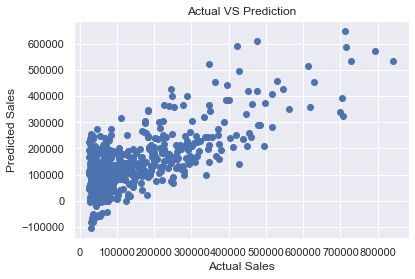



Scores for SVR() are
Mean Absolute Error: 99734.1538663563
Mean Squared Error: 23884829746.433815
Root Mean Squared Error: 154547.17644277366
R squared score:  -0.16802494971129578
Cross Validation Score is : [-0.11786182 -0.16605192 -0.09810342 -0.1421233  -0.19548857]
Mean Score : -0.14392580293939283
Difference : 0.024099146771902946


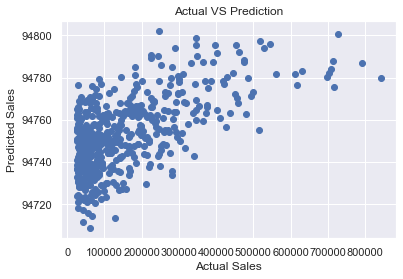



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 78777.04077669902
Mean Squared Error: 13781761180.314564
Root Mean Squared Error: 117395.74600603961
R squared score:  0.3260391185340781
Cross Validation Score is : [0.51886959 0.31544028 0.36995524 0.1356125  0.35026543]
Mean Score : 0.3380286072370621
Difference : 0.011989488702983997


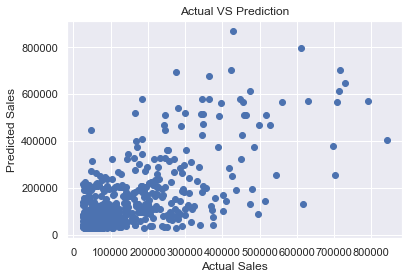



Scores for RandomForestRegressor() are
Mean Absolute Error: 53173.7899223301
Mean Squared Error: 5581091151.895661
Root Mean Squared Error: 74706.70085002859
R squared score:  0.7270713762152563
Cross Validation Score is : [0.69981444 0.6757987  0.70362506 0.72071525 0.61595826]
Mean Score : 0.6831823404127972
Difference : -0.043889035802459064


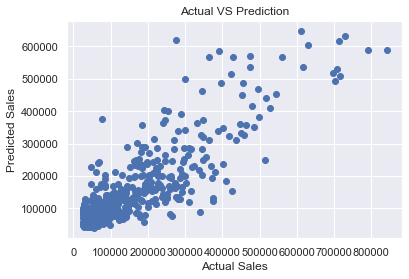



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 52066.730999049716
Mean Squared Error: 5074335386.482882
Root Mean Squared Error: 71234.36941872147
R squared score:  0.7518529377208621
Cross Validation Score is : [0.73712356 0.72873615 0.74359572 0.75309825 0.65688741]
Mean Score : 0.7238882193332492
Difference : -0.02796471838761294


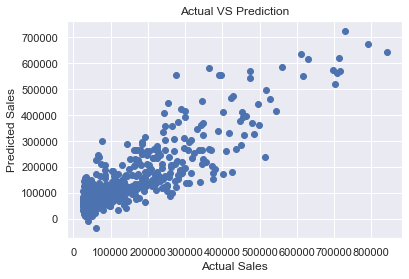

In [84]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predm)))
    print('R squared score: ', r2_score(y_test, predm))
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(y_test, predm))
    plt.scatter(y_test, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

In [94]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [96]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(x_train,y_train)
gv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [97]:
GB1=GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7602969497111487
The mean absolute error 51371.27808237108
root_mean_squared_error: 70011.8889777352


In [98]:
import joblib
joblib.dump(GB1,"Votes.obj")

['Votes.obj']

In [99]:
GB1_l=joblib.load('Votes.obj')